# Point Pattern Analysis

Point pattern analysis is one of the technique to exloratory sptial data analysis. Point pattern analysis centers around the patterns present within point data instead of the attributes associated with the point data. We often focus on the degree of aggregation in the point data, as measured in terms of dispersion and clustering.

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import seaborn as sns
%matplotlib inline
from pointpats import distance_statistics as ds
from pointpats import QStatistic, random, PointPattern 

/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
data_path = '/Users/phuongnguyen/Documents/Code Github/geospatial-data-science-labs/austin_bikeshare_project/austin_bikeshare_trips/austin_bikeshare_trip/austin_bikeshare_stations.csv'
austin_bike_data = pd.read_csv(data_path)
austin_bike_data.head()

,latitude,location,longitude,name,station_id,status
0,30.27041,(30.27041 -97.75046),-97.75046,West & 6th St.,2537,active
1,30.26452,(30.26452 -97.7712),-97.77120,Barton Springs Pool,2572,active
2,30.27595,(30.27595 -97.74739),-97.74739,ACC - Rio Grande & 12th,2545,closed
3,30.28480,(30.2848 -97.72756),-97.72756,Red River & LBJ Library,1004,closed
4,30.26694,(30.26694 -97.74939),-97.74939,Nueces @ 3rd,1008,moved


In [3]:
austin_bike_data.describe()

,latitude,longitude,station_id
count,72.000000,72.000000,72.000000
mean,30.266822,-97.742937,2625.055556
std,0.007811,0.012681,708.966633
min,30.248910,-97.771200,1001.000000
25%,30.262128,-97.749315,2503.750000
50%,30.266955,-97.743200,2562.500000
75%,30.270573,-97.738360,2940.000000
max,30.285760,-97.710020,3687.000000


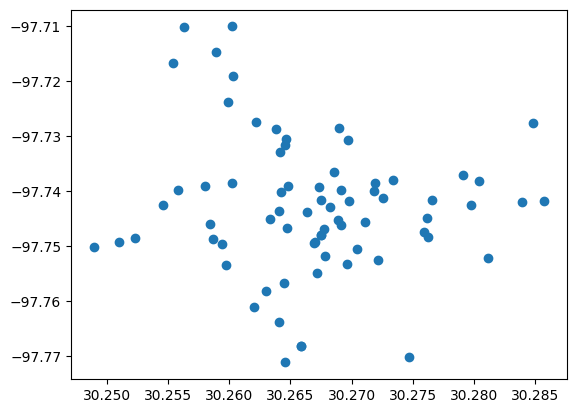

In [4]:
# Make a plot of all points
fig, ax = plt.subplots()
ax.plot(austin_bike_data['latitude'], austin_bike_data['longitude'], 'o')
plt.show()

/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 31 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


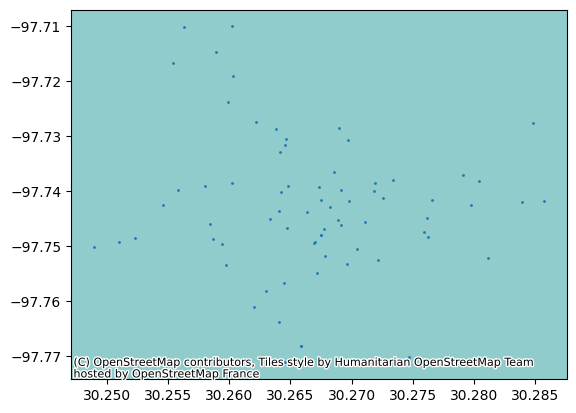

In [5]:
fig, ax = plt.subplots()
ax.plot(austin_bike_data['latitude'], austin_bike_data['longitude'], 'o', markersize=1)
ctx.add_basemap(ax)
plt.show()

In [6]:
# Convert the pandas dataframe into a geopandas geodataframe
store_gdf = gpd.GeoDataFrame(
    austin_bike_data, geometry=gpd.points_from_xy(austin_bike_data.longitude, austin_bike_data.latitude), crs="EPSG:4326"
)

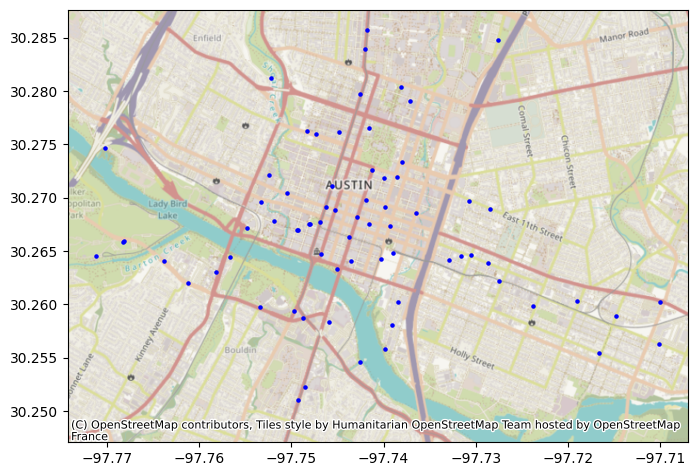

In [7]:
# GeoPandas.plot() to create an initial scatter plot of the data
f, ax = plt.subplots(1, figsize=(8,8))
store_gdf.plot(ax=ax, color='blue', markersize=5)
ctx.add_basemap(ax, crs=store_gdf.crs.to_string())

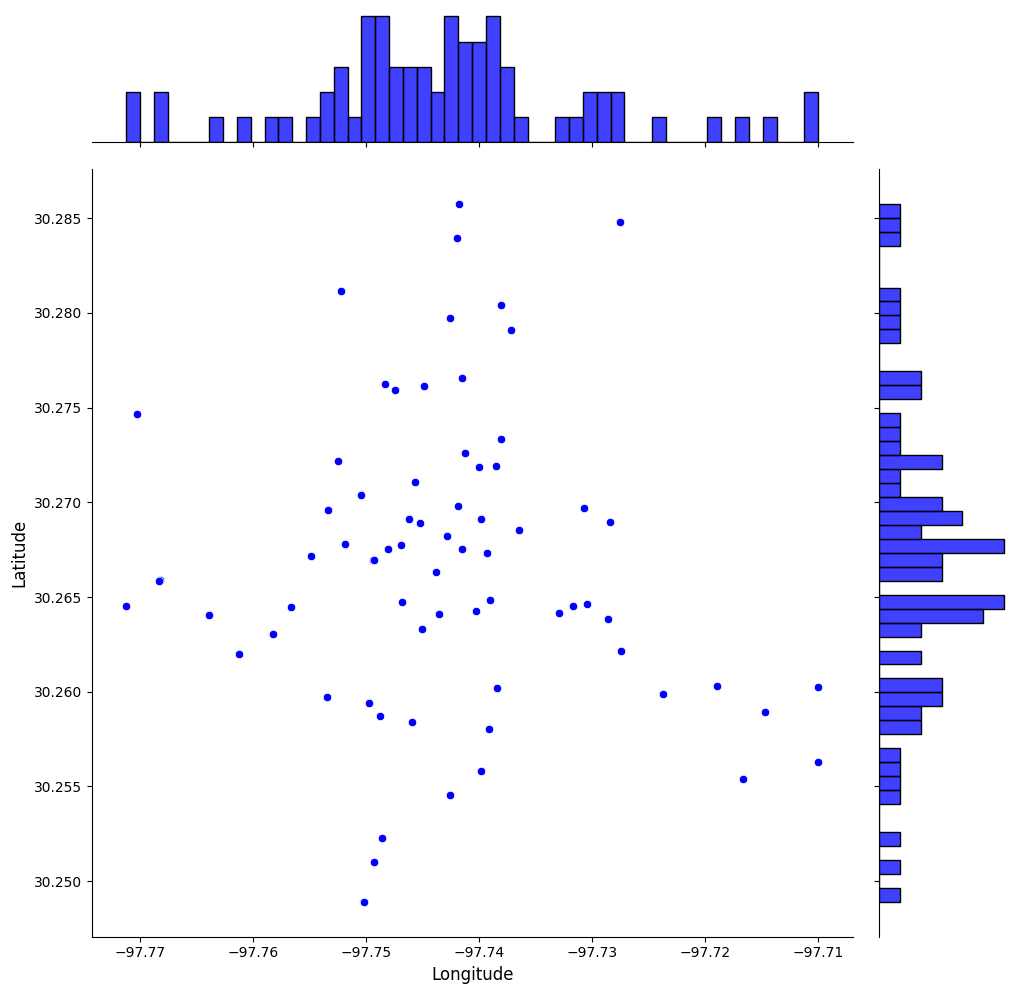

In [11]:
# Create a better visualization 
joint_axes = sns.jointplot(
    x='longitude',
    y='latitude',
    data=austin_bike_data,
    height=10,
    color='blue',
    marginal_kws=dict(bins=50, fill=True)
)
joint_axes.set_axis_labels('Longitude', 'Latitude', fontsize=12)

Ripley's Statistics

In [13]:
# Leverage Ripley's Statistics to analyze point patterns
g_test = ds.g_test(
    austin_bike_data[['longitude', 'latitude']].values, 
    support = 40,
    keep_simulations=True
)

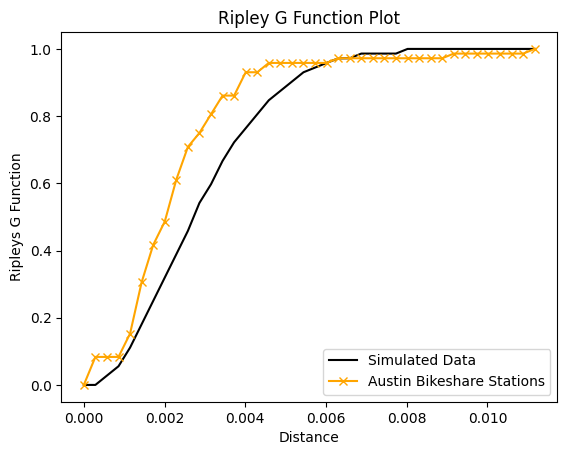

In [16]:
# Plot Ripley's G on top of simulated CSR dataset:
plt.plot(g_test.support,
         np.median(g_test.simulations, axis=0),
         color='k', label='Simulated Data')

plt.plot(g_test.support,
         g_test.statistic,
         marker='x',
         color = 'orange', 
         label='Austin Bikeshare Stations')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Ripleys G Function')
plt.title('Ripley G Function Plot')
plt.show()

The orange line represents the cumulative distance from the store locations dataset.
The black line represents a simulated distribution.
Between distances of 0 and 0.004 the observed data rises much more rapidly than the simulated data. From this, we can deduce that the store location data has a significant spatial pattern

# Ripley's K function 
Ripley K considers all distances and not just those of the closet neighbor.

In [17]:
# Call the k_test() function from pointpats to run Ripley's K
k_test = ds.k_test(
    austin_bike_data[['longitude', 'latitude']].values,
    keep_simulations=True
)

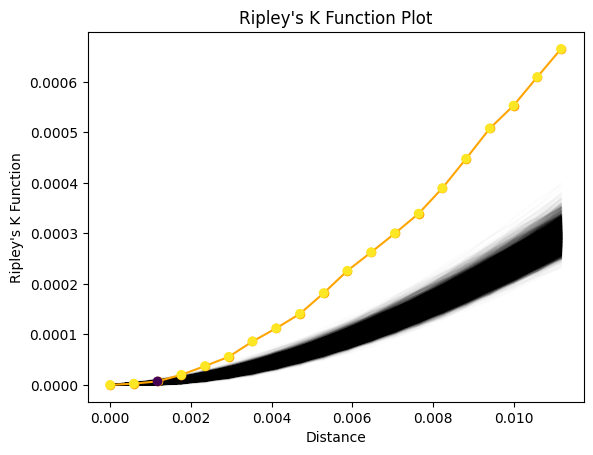

In [21]:
# Plot the results
plt.plot(k_test.support,
         k_test.simulations.T,
         color='k', 
         alpha=0.01)
plt.plot(k_test.support,
         k_test.statistic,
         marker='o',
         color = 'orange')
plt.scatter(k_test.support,
            k_test.statistic,
            cmap='viridis',
            c=k_test.pvalue < 0.05,
            zorder=4)
plt.xlabel('Distance')
plt.ylabel("Ripley's K Function")
plt.title("Ripley's K Function Plot")
plt.show()